## NEURONAL NETWORK PRUEBA 3
PROYECTO DE GESTIÓN DE REDES - Gestión de redes IoT

In [1]:
import pandas as pd
import os

# Definir rutas de las carpetas
test_path = "Test_Prueba3"
train_path = "Train_Prueba3"

# Cargar archivos de prueba
test_files = {
    "Benigno": "Benign_test.csv",
    "Maligno": "Maligno_test.csv"
}

test_data = {name: pd.read_csv(os.path.join(test_path, file)) for name, file in test_files.items()}

# Cargar archivos de entrenamiento
train_files = {
    "Benigno": "Benign_train.csv",
    "Maligno": "Maligno_train.csv"
}

train_data = {name: pd.read_csv(os.path.join(train_path, file)) for name, file in train_files.items()}

In [2]:
# Acceder a un DataFrame 
df_analizar = test_data["Benigno"]
df_analizar.head()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Attack_Label
0,227.8,6.0,64.0,24502.562704,24502.562704,0.0,0.0,0.0,0.0,0.5,...,214.732903,80.2,1.694703e+08,13.5,15.986909,304.317403,46658.604609,1.0,244.6,Benign
1,419.7,6.0,64.0,2.803381,2.803381,0.0,0.0,0.0,0.0,0.5,...,212.496572,80.7,1.694703e+08,13.5,16.395363,301.176484,45690.432897,1.0,244.6,Benign
2,465.6,6.0,64.0,22401.599171,22401.599171,0.0,0.0,0.0,0.0,0.5,...,10.824942,80.8,1.002255e-01,5.5,12.275612,15.308779,136.782165,0.9,38.5,Benign
3,635.2,6.0,64.0,2.291666,2.291666,0.0,0.0,0.0,0.0,0.5,...,15.790866,78.2,1.694703e+08,13.5,12.571921,22.372255,250.650009,1.0,244.6,Benign
4,612.5,6.0,64.0,1.924983,1.924983,0.0,0.0,0.0,0.0,0.5,...,15.714200,78.3,1.469851e-04,5.5,12.568932,22.223235,280.973305,0.9,38.5,Benign


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Unir los DataFrames de entrenamiento y prueba
train_df = pd.concat(train_data.values(), ignore_index=True)
test_df = pd.concat(test_data.values(), ignore_index=True)

# Separar características y etiquetas
X_train = train_df.drop(columns=['Attack_Label'])
y_train = train_df['Attack_Label']
X_test = test_df.drop(columns=['Attack_Label'])
y_test = test_df['Attack_Label']

# Codificar las etiquetas
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir la red neuronal
model = keras.Sequential([
    keras.layers.Dense(256, activation='tanh', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='tanh'),
    keras.layers.Dense(64, activation='tanh'),
    keras.layers.Dense(32, activation='tanh'),
    keras.layers.Dense(len(np.unique(y_train)), activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Hacer predicciones
y_pred_probs = model.predict(X_test)  # Predicciones en probabilidades
y_pred = np.argmax(y_pred_probs, axis=1)  # Convertir a clases

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Promedio ponderado
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Mostrar resultados
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

# Mejores parámetros: {'batch_size': 16, 'epochs': 50, 'model__activation': 'tanh', 'model__neurons1': 128, 'model__neurons2': 64, 'model__optimizer': 'rmsprop'}

c:\Users\itsal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
9688/9688 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.9132 - loss: 0.2429 - val_accuracy: 0.8680 - val_loss: 0.3616
Epoch 2/50
9688/9688 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.9274 - loss: 0.1815 - val_accuracy: 0.8813 - val_loss: 0.2785
Epoch 3/50
9688/9688 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.9310 - loss: 0.1752 - val_accuracy: 0.8799 - val_loss: 0.2772
Epoch 4/50
9688/9688 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.9332 - loss: 0.1662 - val_accuracy: 0.8800 - val_loss: 0.2900
Epoch 5/50
9688/9688 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.9336 - loss: 0.1662 - val_accuracy: 0.8649 - val_loss: 0.3491
Epoch 6/50
9688/9688 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.9334 - loss: 0.1647 - val_accuracy: 0.8896 - val_loss: 0.3064
Epoch 7/50
9688/9688 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.9339 - loss: 0.1634 - val_accuracy: 0.8953 - val_loss: 0.3085
Epoch 8/50
9688/9688 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.9348 - loss: 0

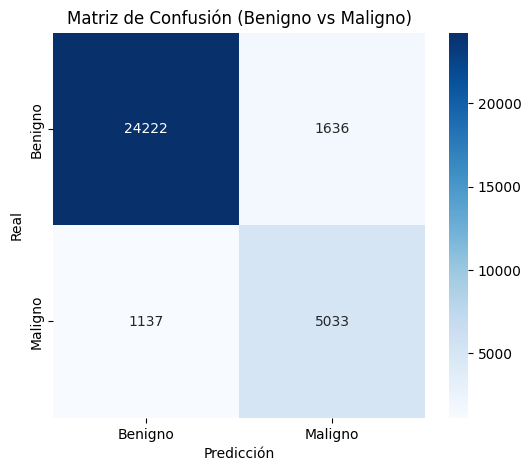

Accuracy: 0.9134
Precision: 0.7547
Recall: 0.8157
F1-Score: 0.7840


In [4]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Mapear las etiquetas originales a dos clases: Benigno (0) y Maligno (1)
benigno_label = label_encoder.transform(['Benign'])[0]  # Obtener el valor numérico de "Benigno"
y_test_binary = np.where(y_test == benigno_label, 0, 1)
y_pred_binary = np.where(y_pred == benigno_label, 0, 1)

# Crear la matriz de confusión
cm = confusion_matrix(y_test_binary, y_pred_binary)

# Graficar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión (Benigno vs Maligno)')
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcular métricas para la clasificación binaria (Benigno vs Maligno)
accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

# Mostrar resultados
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
